In [39]:
import pandas as pd
import pyodbc as py
connection_string = (    
    r'Driver={SQL Server};'
    r'Server=DESKTOP-MATHILD\SQLEXPRESS;'
    r'Integrated Security=SSPI;'
    r'Trusted_Connection=yes;'
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Hello

In [19]:
def sql2df(query, params=[], parse_dates=None, dsn='SQLEXPRESS'):
        with py.connect(connection_string, readonly=True) as conn:
            return pd.read_sql(query, conn, params=params, parse_dates=parse_dates)

In [49]:
query_1 = '''
select o.[year],
       o.[week],
       o.happy_orders,
       o.unhappy_orders,
       o.unknown_orders
from BOL.dbo.ordersPerClassification o
    left join BOL.dbo.checkOrdersPerClassification c
        on c.[week] = o.[week]
           and c.[year] = o.[year]
order by 1,
         2;
'''
df1 = sql2df(query_1)

query_2 = '''
select o.[year],
       o.[week],
       c.happy_orders [check_happy_orders],
       c.unhappy_orders [check_unhappy_orders],
       c.unknown_orders [check_unknown_orders]
from BOL.dbo.ordersPerClassification o
    left join BOL.dbo.checkOrdersPerClassification c
        on c.[week] = o.[week]
           and c.[year] = o.[year]
order by 1,
         2;
'''
df2 = sql2df(query_2)

query_3 = '''
select o.[year],
       o.[week],
       (c.happy_orders - o.happy_orders)*1e2 / c.happy_orders [difference_happy_orders],
       (c.unhappy_orders - o.unhappy_orders)*1e2 / c.unhappy_orders [difference_unhappy_orders],
       (c.unknown_orders - o.unknown_orders)*1e2 / c.unknown_orders [difference_unknown_orders]
from BOL.dbo.ordersPerClassification o
    left join BOL.dbo.checkOrdersPerClassification c
        on c.[week] = o.[week]
           and c.[year] = o.[year]
order by 1,
         2;
'''
df3 = sql2df(query_3)

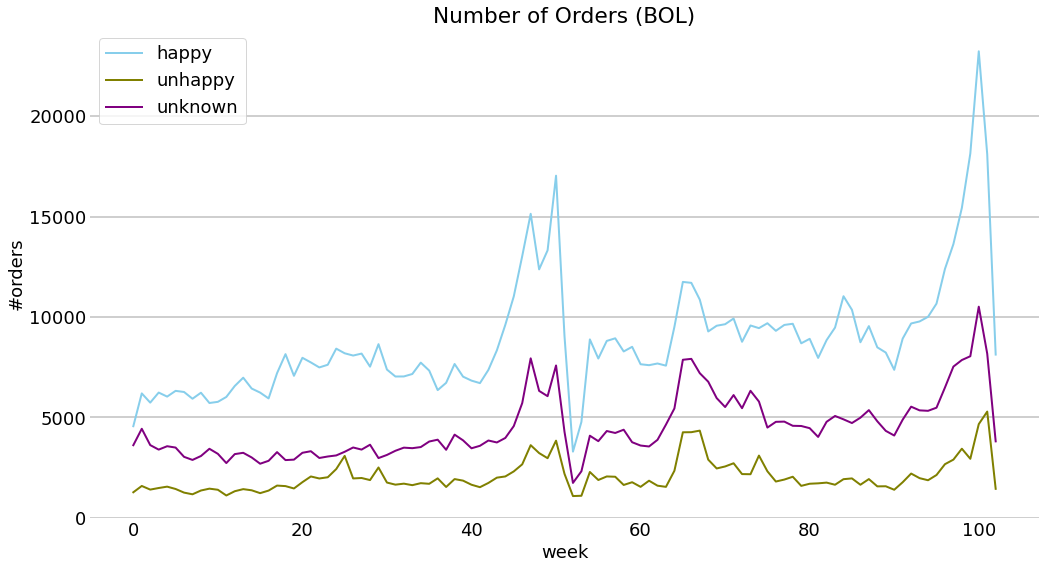

In [42]:
### Plot parameters
plt.rcParams.update({'font.size': 18})

# Turn interactive plotting off
plt.ioff()

### Plotten
plt.figure(figsize = (17,9))

d

### Titel
plt.title('Number of Orders (BOL)')

### Assen
plt.ylabel('#orders')
plt.xlabel('week')

### Grafiek Lay-out
plt.grid(color='#C0C0C0', linestyle='-', linewidth=1.5, axis = 'y')
plt.legend()
plt.tick_params(direction='out', length=0, colors='black')
sns.despine(left=True, bottom=True, right=True)

### Save 
# plt.savefig('OHW Grafieken\\OHW - Resultaten (' + str(ziekenhuis) + ')', bbox_inches = 'tight')
# plt.close('all')    

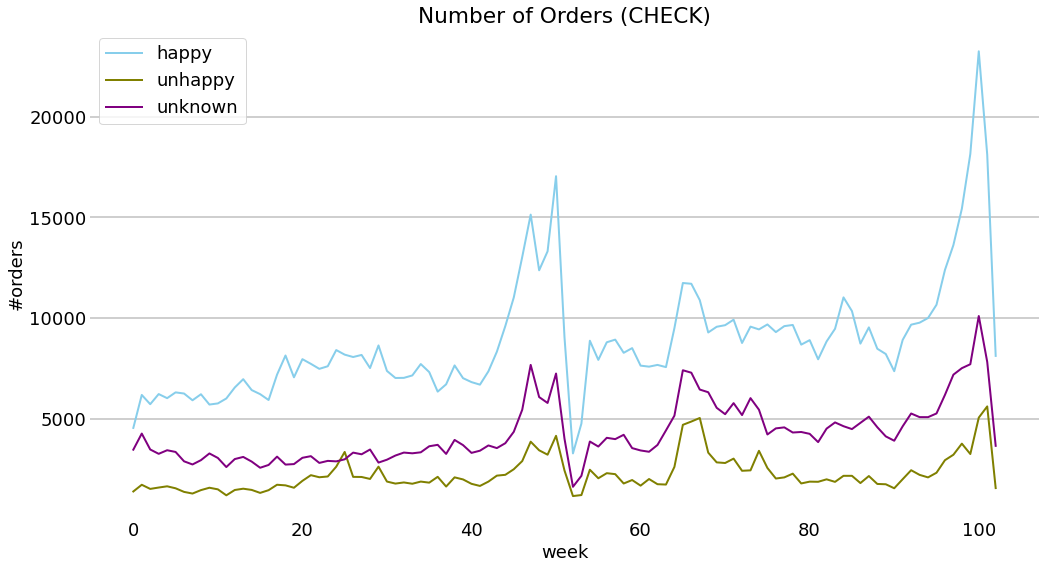

In [43]:
### Plot parameters
plt.rcParams.update({'font.size': 18})

# Turn interactive plotting off
plt.ioff()

### Plotten
plt.figure(figsize = (17,9))

plt.plot( df2.index, 'check_happy_orders', data=df2, marker='', color='skyblue', linewidth=2, label="happy")
plt.plot( df2.index, 'check_unhappy_orders', data=df2, marker='', color='olive', linewidth=2, label="unhappy")
plt.plot( df2.index, 'check_unknown_orders', data=df2, marker='', color='purple', linewidth=2, label="unknown")

### Titel
plt.title('Number of Orders (CHECK)')

### Assen
plt.ylabel('#orders')
plt.xlabel('week')

### Grafiek Lay-out
plt.grid(color='#C0C0C0', linestyle='-', linewidth=1.5, axis = 'y')
plt.legend()
plt.tick_params(direction='out', length=0, colors='black')
sns.despine(left=True, bottom=True, right=True)

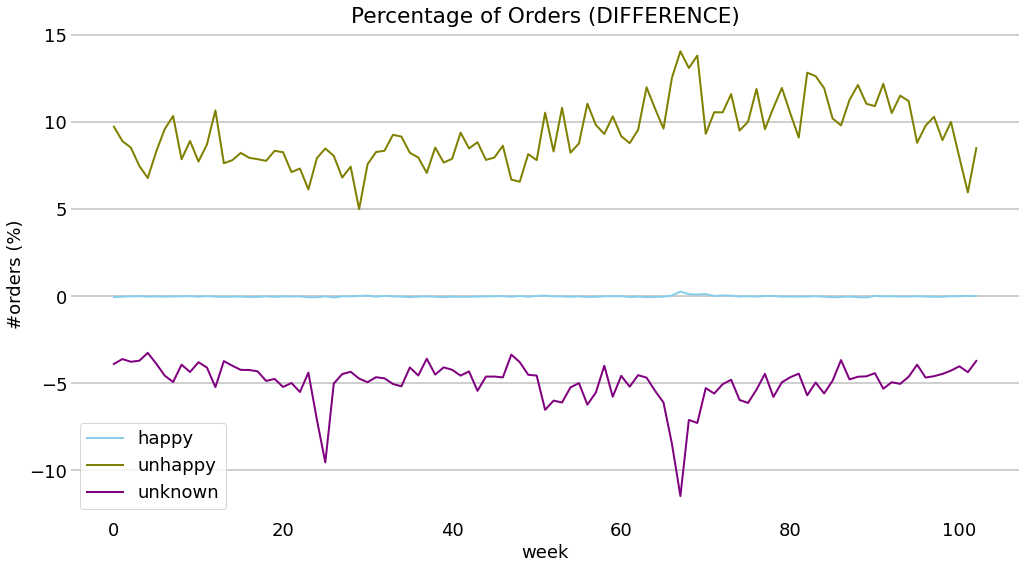

In [53]:
### Plot parameters
plt.rcParams.update({'font.size': 18})

# Turn interactive plotting off
plt.ioff()

### Plotten
plt.figure(figsize = (17,9))

plt.plot( df3.index, 'difference_happy_orders', data=df3, marker='', color='skyblue', linewidth=2, label="happy")
plt.plot( df3.index, 'difference_unhappy_orders', data=df3, marker='', color='olive', linewidth=2, label="unhappy")
plt.plot( df3.index, 'difference_unknown_orders', data=df3, marker='', color='purple', linewidth=2, label="unknown")

### Titel
plt.title('Percentage of Orders (DIFFERENCE)')

### Assen
plt.ylabel('#orders (%)')
plt.xlabel('week')

### Grafiek Lay-out
plt.grid(color='#C0C0C0', linestyle='-', linewidth=1.5, axis = 'y')
plt.legend()
plt.tick_params(direction='out', length=0, colors='black')
sns.despine(left=True, bottom=True, right=True)